In [1]:
import os
import logging
import churn_library_solution as cls
from time import gmtime, strftime

time_now=strftime("%Y-%m-%d_%H-%M-%S", gmtime())

logging.basicConfig(
    filename='./logs/churn_library'+time_now+'.log',
    level = logging.INFO,
    filemode='w',
    format='%(name)s - %(levelname)s - %(message)s')

In [2]:
def test_import(import_data):
	'''
	test data import - this example is completed for you to assist with the other test functions
    
    input:
        import_data: This is a function to return a load pd dataframe
	'''
	try:
		df = import_data("./data/bank_data.csv")
		logging.info("Testing import_data: SUCCESS")
	except FileNotFoundError as err:
		logging.error("Testing import_eda: The file wasn't found")
		raise err

	try:
		assert df.shape[0] > 0
		assert df.shape[1] > 0
	except AssertionError as err:
		logging.error("Testing import_data: The file doesn't appear to have rows and columns")
		raise err
        
test_import(cls.import_data)

Head to the dataset: 
   Unnamed: 0  CLIENTNUM     Attrition_Flag  Customer_Age Gender  \
0           0  768805383  Existing Customer            45      M   
1           1  818770008  Existing Customer            49      F   
2           2  713982108  Existing Customer            51      M   
3           3  769911858  Existing Customer            40      F   
4           4  709106358  Existing Customer            40      M   

   Dependent_count Education_Level Marital_Status Income_Category  \
0                3     High School        Married     $60K - $80K   
1                5        Graduate         Single  Less than $40K   
2                3        Graduate        Married    $80K - $120K   
3                4     High School        Unknown  Less than $40K   
4                3      Uneducated        Married     $60K - $80K   

  Card_Category  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0          Blue  ...                       1                      3   
1          B

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


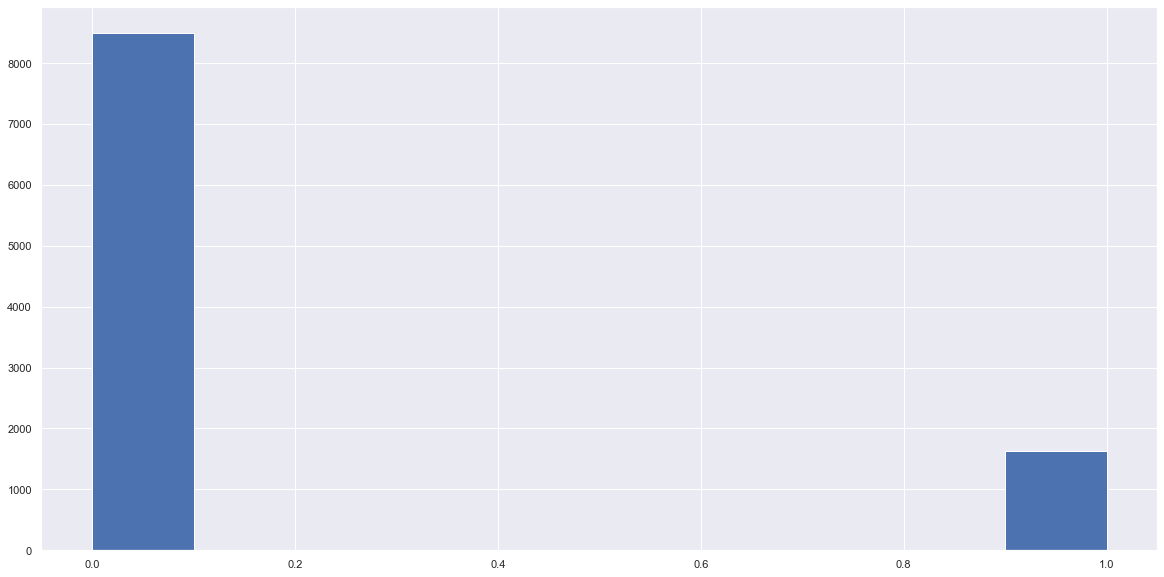

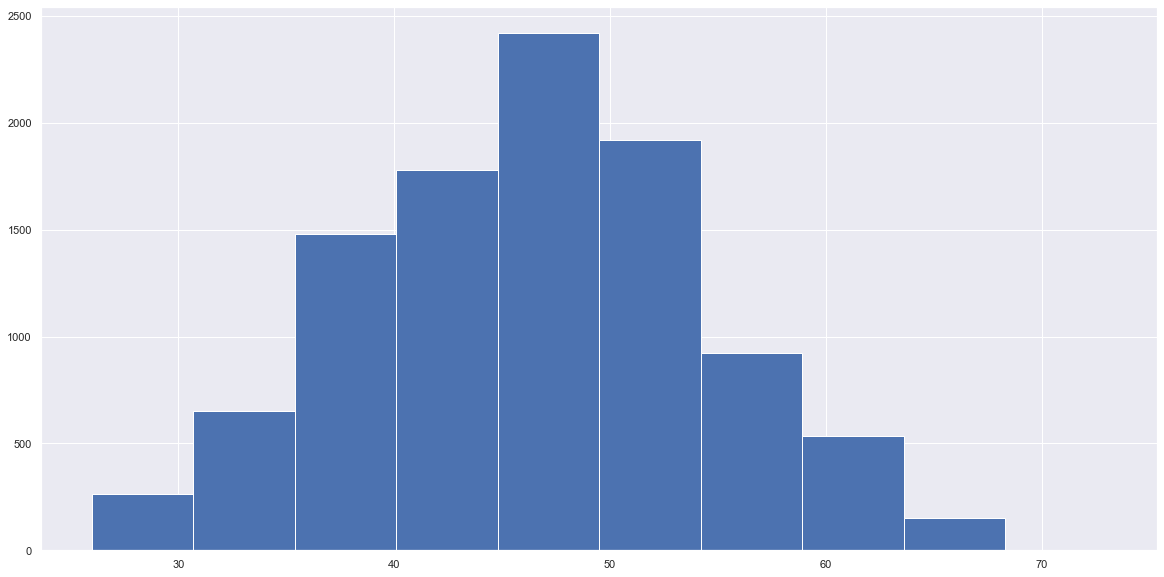

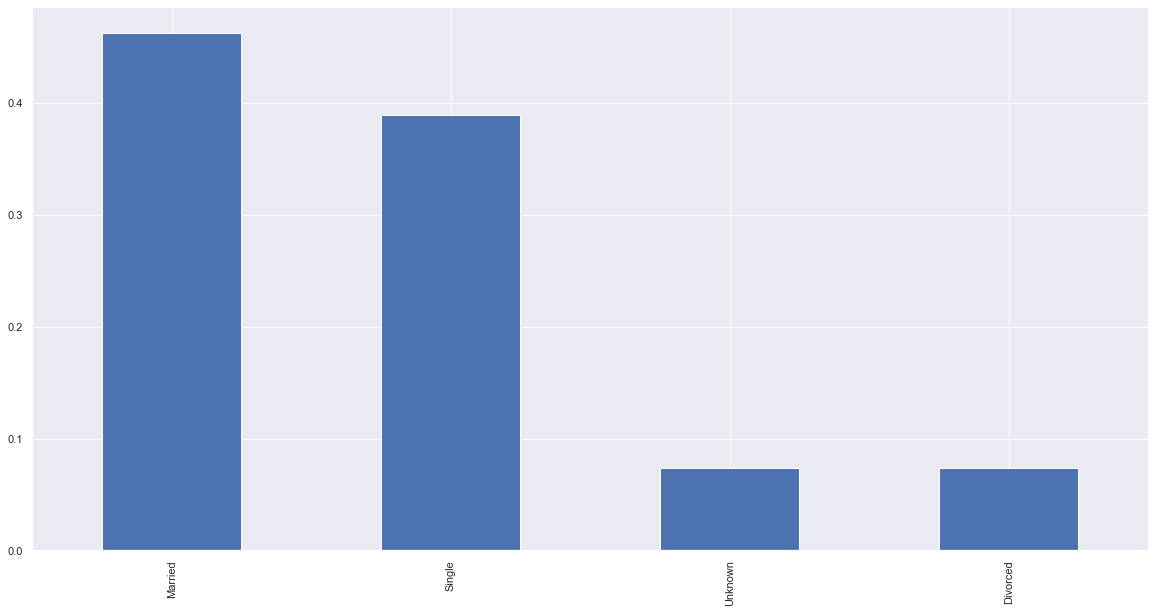

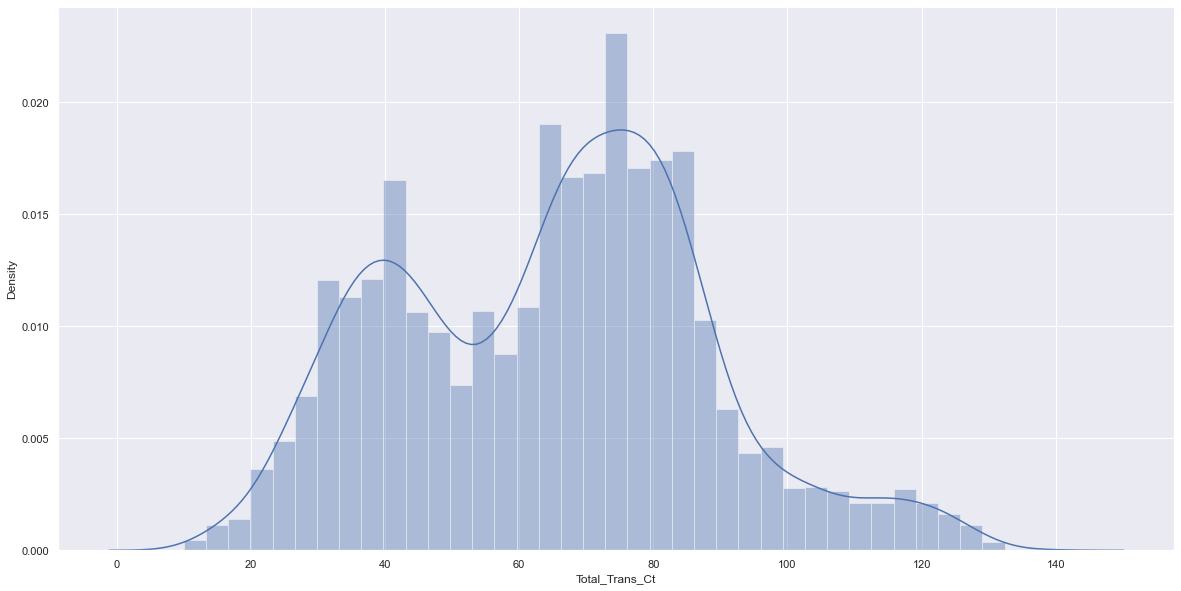

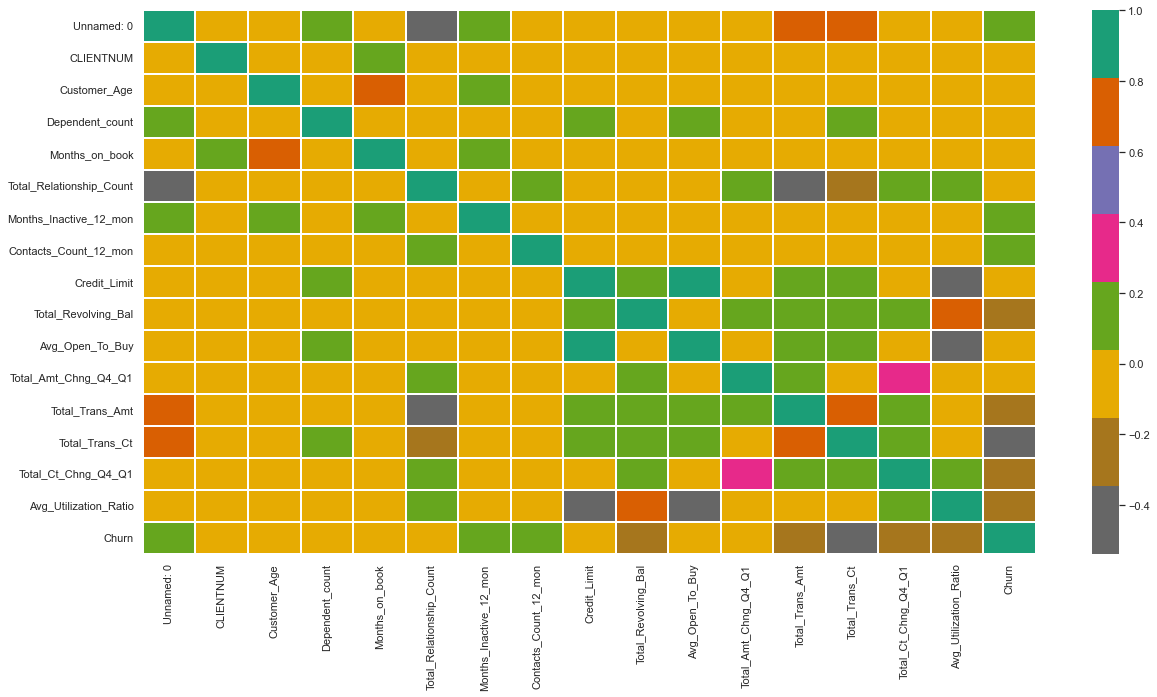

In [9]:
def test_eda(perform_eda):
	'''
	test perform eda function
    
    input:
        perform_eda: This is a function to return nothing, but it do it a Eda analysis in the data
	'''
    
	try:
		dataframe = cls.import_data("./data/bank_data.csv")
		perform_eda(dataframe)
		logging.info("Testing perform_eda: SUCCESS")
	except FileNotFoundError as err:
		logging.error("Testing perform_eda: The file wasn't found")
		raise err
	except NameError as err:
		logging.error("Testing perform_eda: The file dataframe wasn't defined accuratly")
		raise err
        
test_eda(cls.perform_eda)  

In [18]:
def test_encoder_helper(encoder_helper):
	'''
	test encoder helper
    
    input:
        encoder_helper: this function return a dataframe with some encoded columns
	'''
    
	CAT_COLUMNS = [
        'Gender',
        'Education_Level',
        'Marital_Status',
        'Income_Category',
        'Card_Category'
    ]
    
	try:
		dataframe = cls.import_data("./data/bank_data.csv")
		dataframe['Churn'] = dataframe['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)
		dataframe = encoder_helper(dataframe, CAT_COLUMNS, 'Churn')
		logging.info("Testing encoder_helper: SUCCESS")
	except FileNotFoundError as err:
		logging.error("Testing encoder_helper: The file wasn't found")
		raise err
	except NameError as err:
		logging.error("Testing encoder_helper: The file dataframe wasn't defined accuratly")
		raise err
	except KeyError as err:
		logging.error("Testing encoder_helper:  any of the keys in CAT_COLUMNS is bad defined")
		raise err
        
	try:
		assert dataframe.shape[0] > 0
		assert dataframe.shape[1] > 0
	except AssertionError as err:
		logging.error("Testing encoder_helper: The file doesn't appear to have rows and columns")
		raise err

	return dataframe

    
dataframe_encoded = test_encoder_helper(cls.encoder_helper)

In [19]:
def test_perform_feature_engineering(perform_feature_engineering, dataframe_encoded):
	'''
	test perform_feature_engineering
    
    input:
        perform_feature_engineering: Function that perform engineering about the data and
        make the separation of train and test variables
        
        dataframe_encoded: This is the output of encoder_helper, is necessary to have all
        the necessary data to process the ml
        
	'''
    
	REMOVE_COLS = ['Unnamed: 0', 'CLIENTNUM', 'Churn']
    
	try:
		X_train, X_test, y_train, y_test = perform_feature_engineering(
        dataframe_encoded, 'Churn', REMOVE_COLS)
        
		logging.info("Testing test_perform_feature_engineering: SUCCESS")
	except FileNotFoundError as err:
		logging.error("Testing test_perform_feature_engineering: The file wasn't found")
		raise err
	except NameError as err:
		logging.error("Testing test_perform_feature_engineering: The file dataframe wasn't defined accuratly")
		raise err
	except KeyError as err:
		logging.error("Testing test_perform_feature_engineering:  any of the keys in REMOVE_COLS is bad defined")
		raise err
        
	try:
		assert X_train.shape[0] > 0
		assert y_train.shape[0] > 0
	except AssertionError as err:
		logging.error("Testing test_perform_feature_engineering: The file doesn't appear to have rows and columns")
		raise err
        
	return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = test_perform_feature_engineering(cls.perform_feature_engineering, dataframe_encoded)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


random forest results
test results
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2543
           1       0.93      0.80      0.86       496

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039

train results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5957
           1       1.00      1.00      1.00      1131

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088

logistic regression results
test results
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2543
           1       0.70      0.46      0.56       496

    accuracy                           0.88      3039
   macro avg       0.80      0.71     

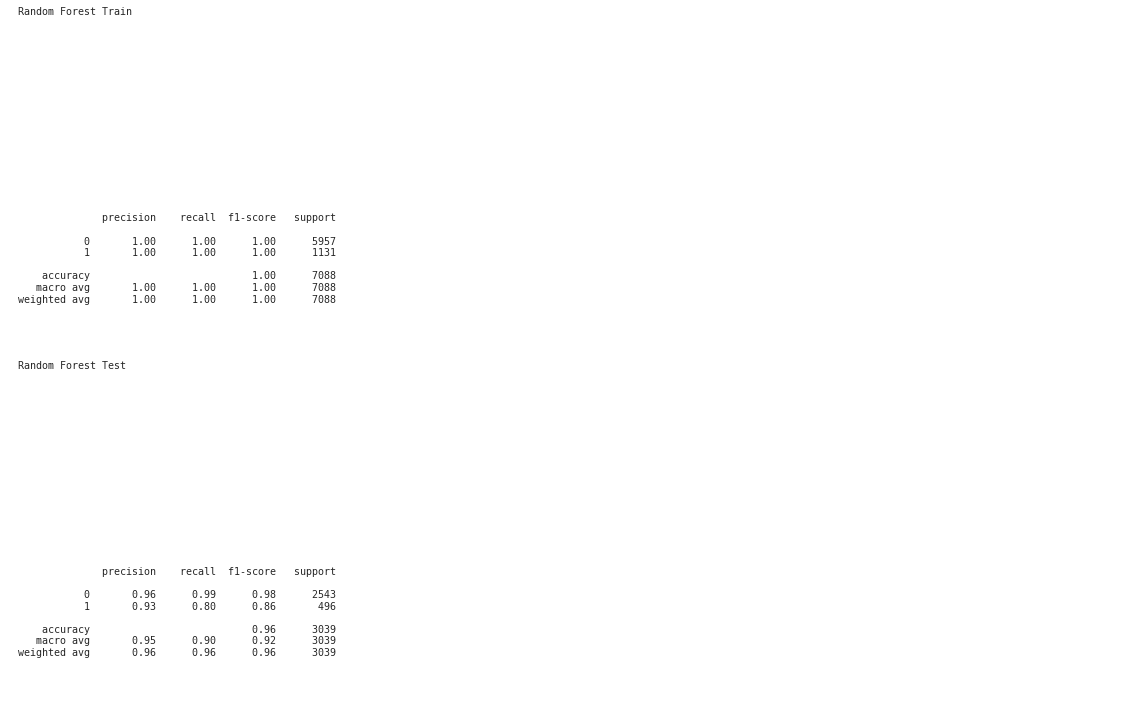

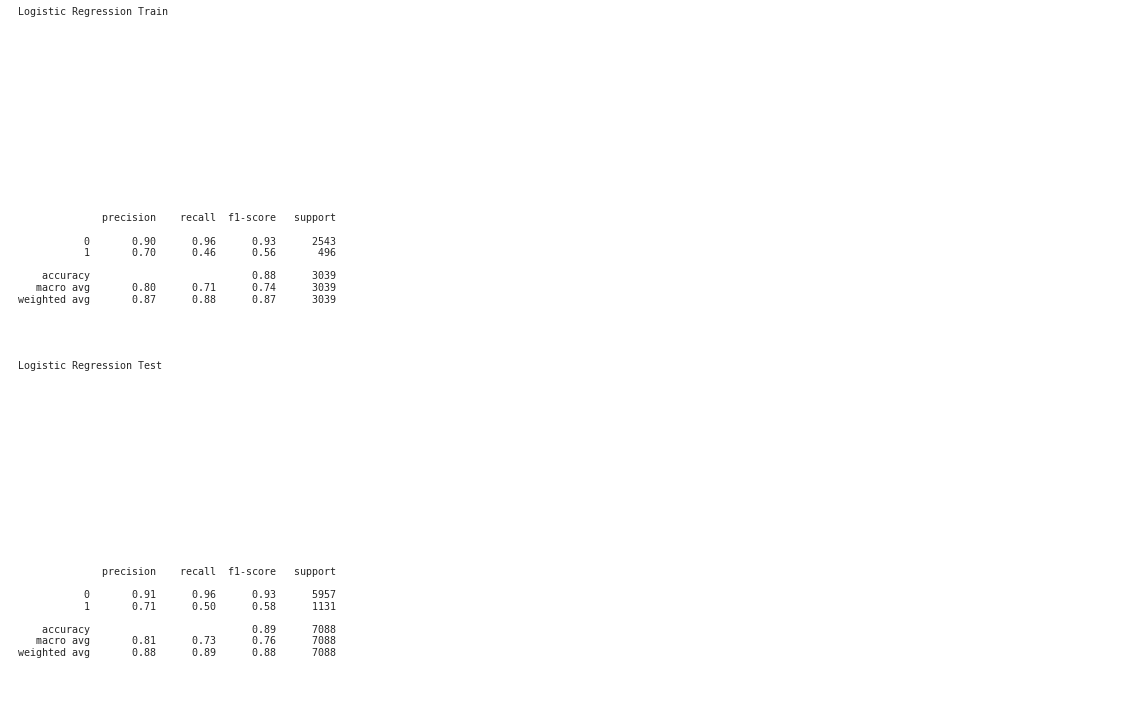

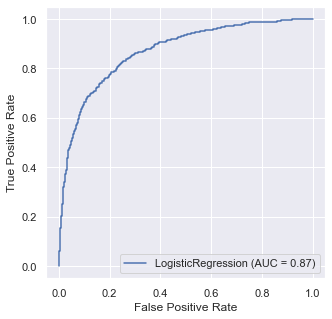

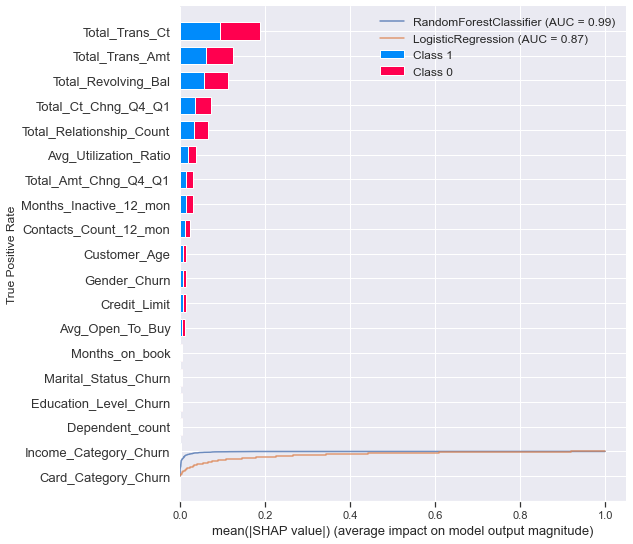

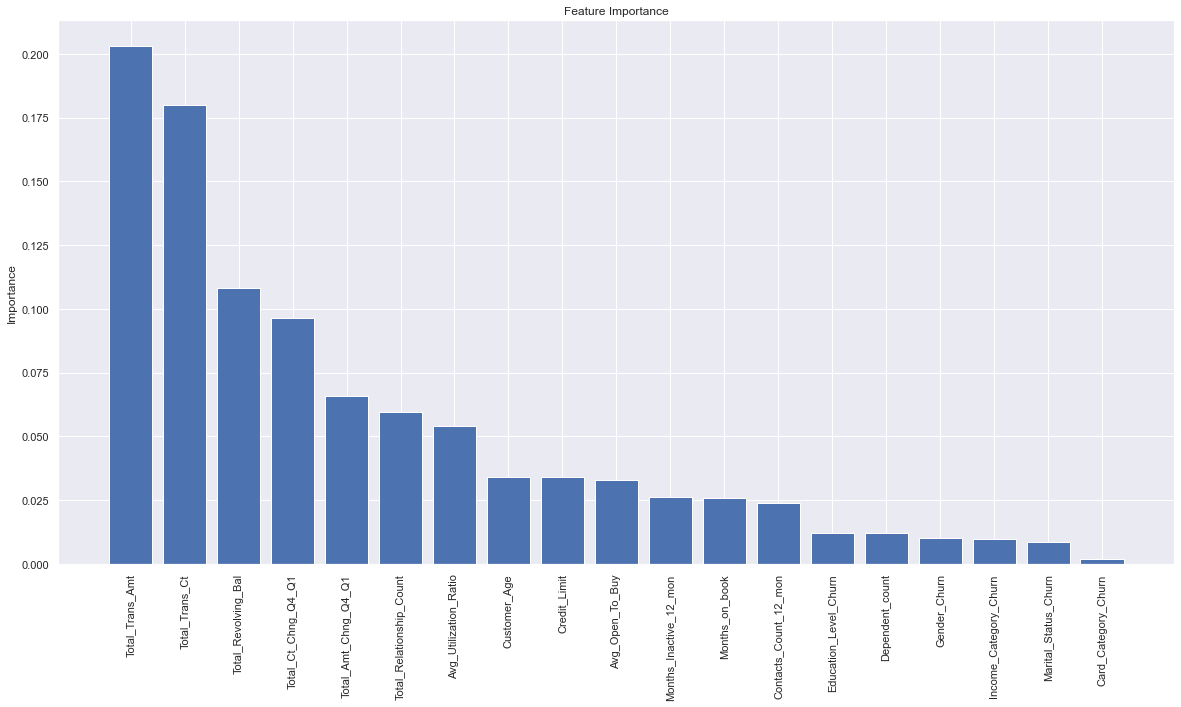

In [23]:
def test_train_models(train_models,X_train, X_test, y_train, y_test):
	'''
	test train_models
    
    input:
        train_models: Function that train two models to predict customer churn
        X_train: X training data obtain from test_perform_feature_engineering
        X_test: X testing data obtain from test_perform_feature_engineering
        y_train: y training data obtain from test_perform_feature_engineering
        y_test: y testing data obtain from test_perform_feature_engineering
	'''
    
	try:
		train_models(X_train, X_test, y_train, y_test)
		logging.info("Testing test_train_models: SUCCESS")
	except ValueError as err:    
		logging.error("Testing test_train_models: Some of the Train variables is empty or bad defined")
		raise err
	except NameError as err:
		logging.error("Testing test_train_models: some of the train or test variables wasn't defined accuratly")
		raise err
    

test_train_models(cls.train_models,X_train, X_test, y_train, y_test)
    